In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.summary.summary_iterator import summary_iterator

# Read Tensorboard Logs

**Get log files**

In [3]:
def get_tfb_file(directory):
    file_list = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = subdir + os.sep + file
            file_list.append(filepath)
    
    return file_list

**Get the Data**

In [4]:
def get_tfb_data(files, tag):
    data_list = []
    for f in files:
        data = []
        for e in summary_iterator(f):
            for v in e.summary.value:
                if v.tag == tag:
                    data.append(v.simple_value)
        data_list.append(data)
    
    return data_list

# 1. Image-Specific Attacks

In [5]:
image_specific_log_file = get_tfb_file("logs/image-specific/online")

In [6]:
image_specific_log_file

['logs/image-specific/online/20220822-223318/events.out.tfevents.1661204011.5CG027B3S1',
 'logs/image-specific/online/20220823-221141/events.out.tfevents.1661289119.5CG027B3S1',
 'logs/image-specific/online/20220822-223411/events.out.tfevents.1661204060.5CG027B3S1']

In [7]:
image_specific_y_true = get_tfb_data(image_specific_log_file, "y_true")

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [8]:
image_specific_y_diff = get_tfb_data(image_specific_log_file, "y_diff")

In [9]:
image_specific_y_adv = get_tfb_data(image_specific_log_file, "y_adv")

## 1.1 Left Attack

In [10]:
MAX_DATA = 90
INDEX = 0

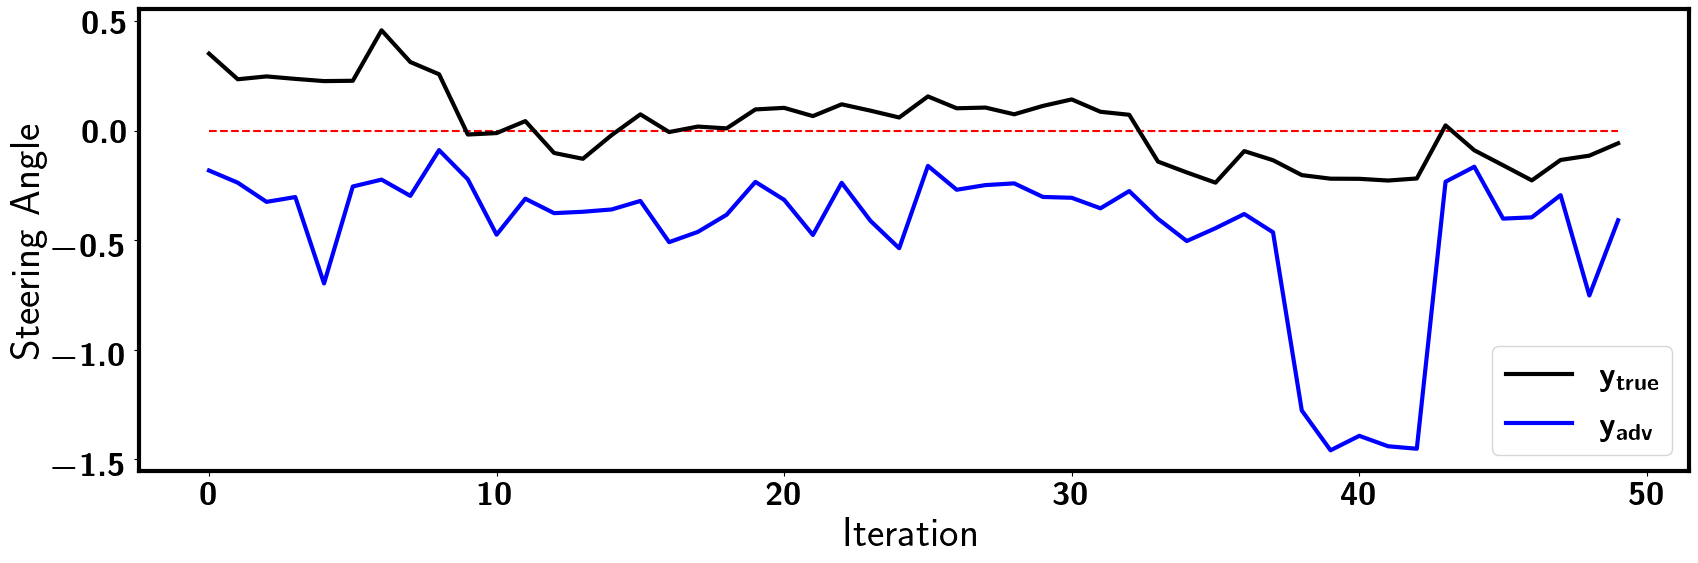

In [11]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (10, 10),
              'font.size': 24,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)


f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(6)
f.set_figwidth(20)

# plt.subplot(1, 2, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Steering Angle')

ax1.plot(image_specific_y_true[INDEX][40:MAX_DATA], 'k-', label='$y_{true}$', linewidth=3)
ax1.plot(image_specific_y_adv[INDEX][40:MAX_DATA], 'b-', label='$y_{adv}$', linewidth=3)

ax1.legend(loc="lower right")

ax1.hlines(0, 0, 50-1, color='red', linestyles='dashed')

plt.show()

In [12]:
f.savefig("left", bbox_inches='tight', pad_inches=0.5)

## 1.2 Right Attack

In [13]:
MAX_DATA = 90
INDEX = 2

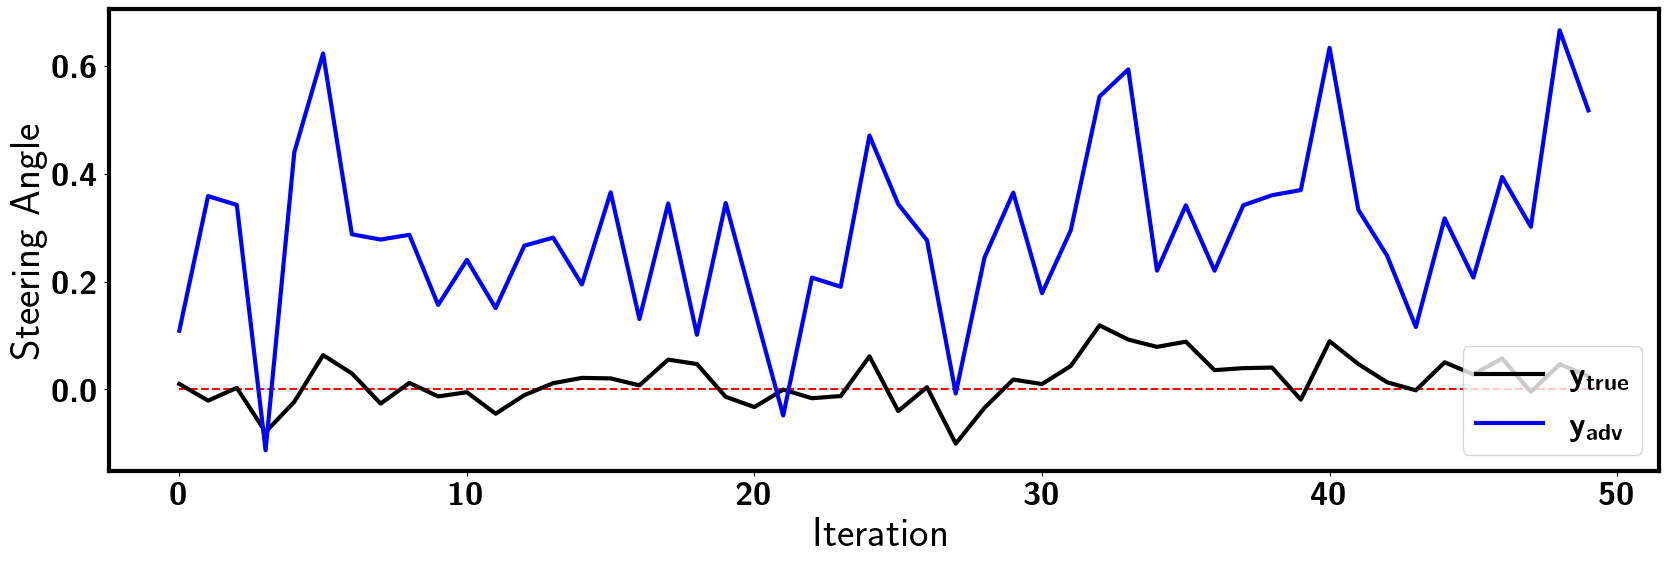

In [14]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (10, 10),
              'font.size': 24,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)


f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(6)
f.set_figwidth(20)

# plt.subplot(1, 2, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Steering Angle')

ax1.plot(image_specific_y_true[INDEX][40:MAX_DATA], 'k-', label='$y_{true}$', linewidth=3)
ax1.plot(image_specific_y_adv[INDEX][40:MAX_DATA], 'b-', label='$y_{adv}$', linewidth=3)

ax1.legend(loc="lower right")

ax1.hlines(0, 0, 50-1, color='red', linestyles='dashed')

plt.show()

In [15]:
f.savefig("right", bbox_inches='tight', pad_inches=0.5)

## 1.3 Random Noises

In [16]:
MAX_DATA = 90
INDEX = 1

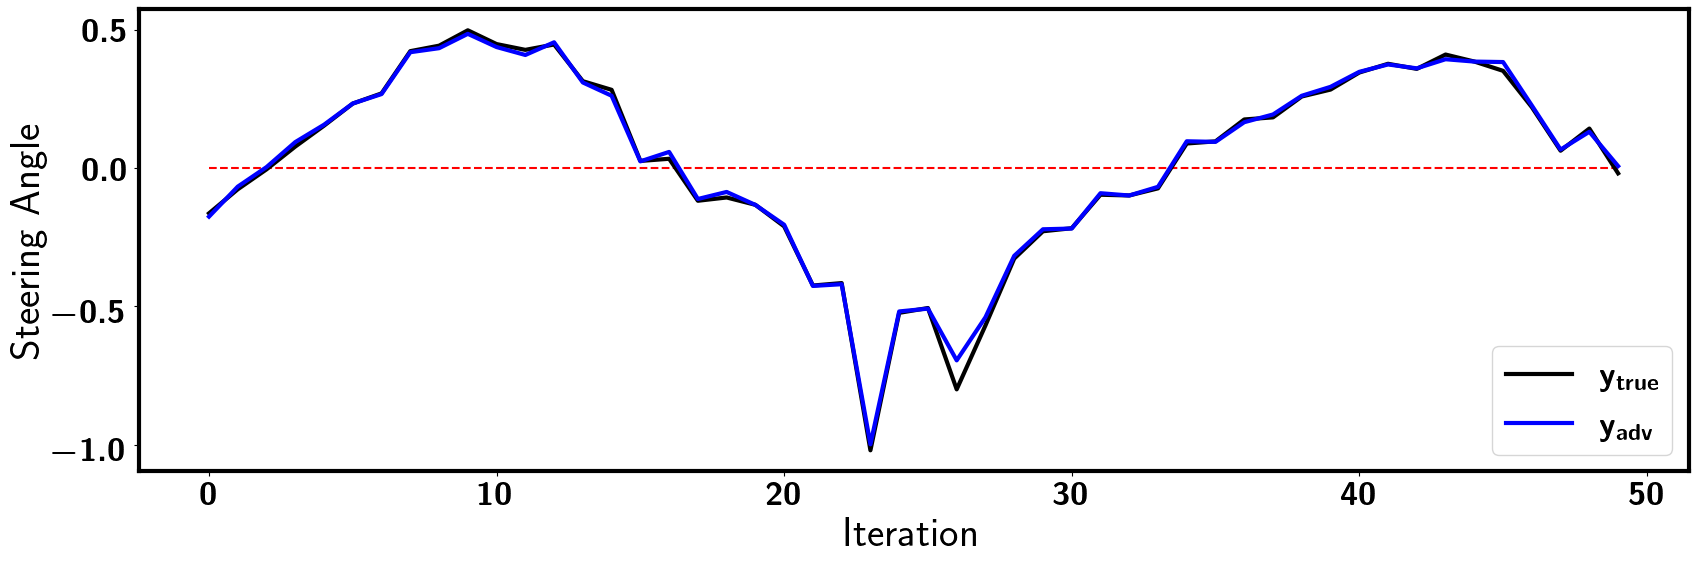

In [17]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (10, 10),
              'font.size': 24,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)


f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(6)
f.set_figwidth(20)

# plt.subplot(1, 2, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Steering Angle')

ax1.plot(image_specific_y_true[INDEX][40:MAX_DATA], 'k-', label='$y_{true}$', linewidth=3)
ax1.plot(image_specific_y_adv[INDEX][40:MAX_DATA], 'b-', label='$y_{adv}$', linewidth=3)

ax1.legend(loc="lower right")

ax1.hlines(0, 0, 50-1, color='red', linestyles='dashed')

plt.show()

In [18]:
f.savefig("random", bbox_inches='tight', pad_inches=0.5)

# 1.4 Summary

**Image-Specific Attacks**

In [19]:
image_specific_epsilon_file = get_tfb_file("logs/image-specific/epsilon")

In [20]:
image_specific_epsilon_file

['logs/image-specific/epsilon/8/20220822-210919/events.out.tfevents.1661198979.5CG027B3S1',
 'logs/image-specific/epsilon/0.1/20220822-205355/events.out.tfevents.1661198068.5CG027B3S1',
 'logs/image-specific/epsilon/2/20220822-210046/events.out.tfevents.1661198474.5CG027B3S1',
 'logs/image-specific/epsilon/1/20220822-205700/events.out.tfevents.1661198234.5CG027B3S1',
 'logs/image-specific/epsilon/4/20220822-210453/events.out.tfevents.1661198711.5CG027B3S1']

In [21]:
image_specific_epsilon_diff = get_tfb_data(image_specific_epsilon_file, "y_diff")

In [22]:
print("[epsilon=0.1] Mean Deviation", np.mean(np.abs(np.array(image_specific_epsilon_diff[0]))[:800]))

[epsilon=0.1] Mean Deviation 2.4469281993759795


In [23]:
print("[epsilon=1] Mean Deviation", np.mean(np.abs(np.array(image_specific_epsilon_diff[1]))[:800]))

[epsilon=1] Mean Deviation 0.14477657665964216


In [24]:
print("[epsilon=2] Mean Deviation", np.mean(np.abs(np.array(image_specific_epsilon_diff[2]))[:800]))

[epsilon=2] Mean Deviation 0.7369272944680415


In [25]:
print("[epsilon=4] Mean Deviation", np.mean(np.abs(np.array(image_specific_epsilon_diff[3]))[:800]))

[epsilon=4] Mean Deviation 0.47792112243827434


In [26]:
print("[epsilon=8] Mean Deviation", np.mean(np.abs(np.array(image_specific_epsilon_diff[4]))[:800]))

[epsilon=8] Mean Deviation 1.4895334438886494


**Random Attacks**

In [27]:
image_specific_random_file = get_tfb_file("logs/random")

In [28]:
image_specific_random_file

['logs/random/8/20220822-171236/events.out.tfevents.1661184783.5CG027B3S1',
 'logs/random/0.1/20220822-171538/events.out.tfevents.1661185053.5CG027B3S1',
 'logs/random/2/20220822-165611/events.out.tfevents.1661184079.5CG027B3S1',
 'logs/random/1/20220822-163039/events.out.tfevents.1661182255.5CG027B3S1',
 'logs/random/4/20220822-170849/events.out.tfevents.1661184546.5CG027B3S1']

In [29]:
image_specific_random_y_diff = get_tfb_data(image_specific_random_file, "y_diff")

In [30]:
print("[epsilon=0.1] Mean Deviation", np.mean(np.array(image_specific_random_y_diff[0])[:800]))

[epsilon=0.1] Mean Deviation 0.027727716835215688


In [31]:
print("[epsilon=1] Mean Deviation", np.mean(np.array(image_specific_random_y_diff[1])[:800]))

[epsilon=1] Mean Deviation 0.00019204879296012224


In [32]:
print("[epsilon=2] Mean Deviation", np.mean(np.array(image_specific_random_y_diff[2])[:800]))

[epsilon=2] Mean Deviation 0.004803999015130103


In [33]:
print("[epsilon=4] Mean Deviation", np.mean(np.array(image_specific_random_y_diff[3])[:800]))

[epsilon=4] Mean Deviation 0.001969894302310422


In [34]:
print("[epsilon=8] Mean Deviation", np.mean(np.array(image_specific_random_y_diff[4])[:800]))

[epsilon=8] Mean Deviation 0.015038610396441072


# 2. Image-Agnostic Attack

## 2.1 Training

### 2. 1.1 Learning Rate (alpha)

In [35]:
image_agnostic_alpha_file = get_tfb_file("logs/image-agnostic/train/alpha")

In [36]:
image_agnostic_alpha_file

['logs/image-agnostic/train/alpha/1_0.001_4/20220823-114456/events.out.tfevents.1661251511.trustai-pc',
 'logs/image-agnostic/train/alpha/1_0.0001_4/20220823-112818/events.out.tfevents.1661250515.trustai-pc',
 'logs/image-agnostic/train/alpha/1_0.0002_4/20220823-160003/events.out.tfevents.1661266818.trustai-pc',
 'logs/image-agnostic/train/alpha/1_0.0004_4/20220823-134627/events.out.tfevents.1661258804.trustai-pc']

In [37]:
image_agnostic_alpha_y_mean = get_tfb_data(image_agnostic_alpha_file, "y_mean")

In [38]:
MAX_DATA = -1

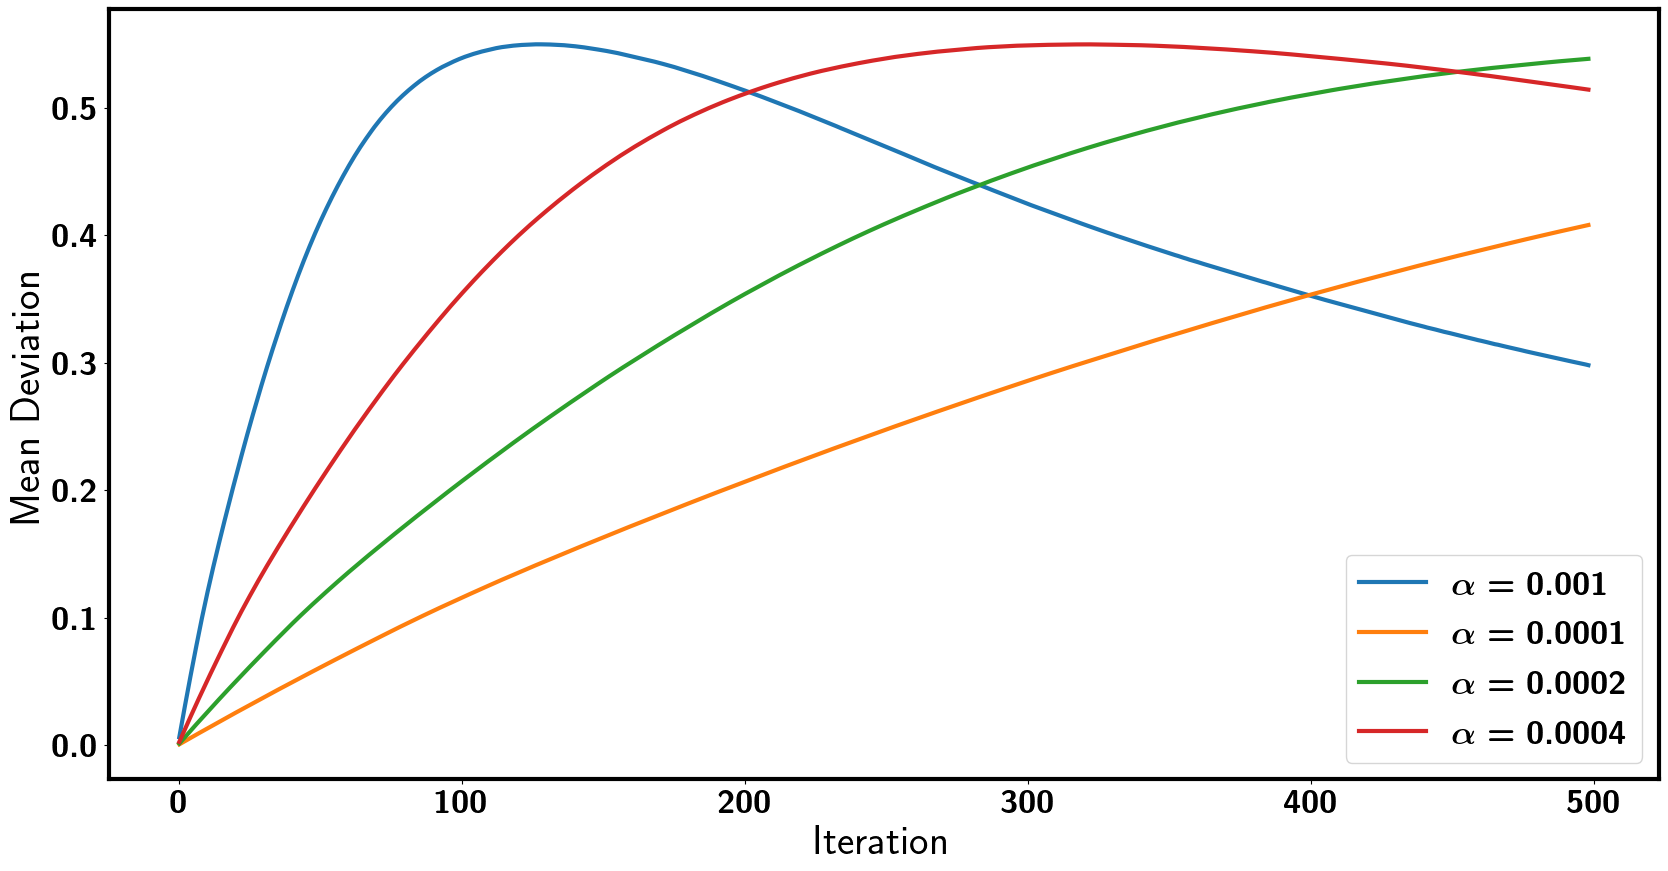

In [39]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (10, 10),
              'font.size': 24,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(20)

# plt.subplot(1, 2, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Mean Deviation')

ax1.plot(image_agnostic_alpha_y_mean[0][:MAX_DATA], label=r'$\alpha=0.001$', linewidth=3)

ax1.plot(image_agnostic_alpha_y_mean[1][:MAX_DATA], label=r'$\alpha=0.0001$', linewidth=3)

ax1.plot(image_agnostic_alpha_y_mean[2][:MAX_DATA], label=r'$\alpha=0.0002$', linewidth=3)

ax1.plot(image_agnostic_alpha_y_mean[3][:MAX_DATA],label=r'$\alpha=0.0004$', linewidth=3)

ax1.legend(loc="lower right")

plt.show()

In [40]:
f.savefig("alpha", bbox_inches='tight', pad_inches=0.5)

### 2.1. 2 Step Size (xi)

In [41]:
image_agnostic_xi_file = get_tfb_file("logs/image-agnostic/train/xi")

In [42]:
image_agnostic_xi_file

['logs/image-agnostic/train/xi/1_0.0002_8/20220823-155610/events.out.tfevents.1661266587.trustai-pc',
 'logs/image-agnostic/train/xi/1_0.0002_1/20220823-161150/events.out.tfevents.1661267524.trustai-pc',
 'logs/image-agnostic/train/xi/1_0.0002_4/20220823-160003/events.out.tfevents.1661266818.trustai-pc']

In [43]:
image_agnostic_xi_y_mean = get_tfb_data(image_agnostic_xi_file, "y_mean")

In [44]:
MAX_DATA = -1

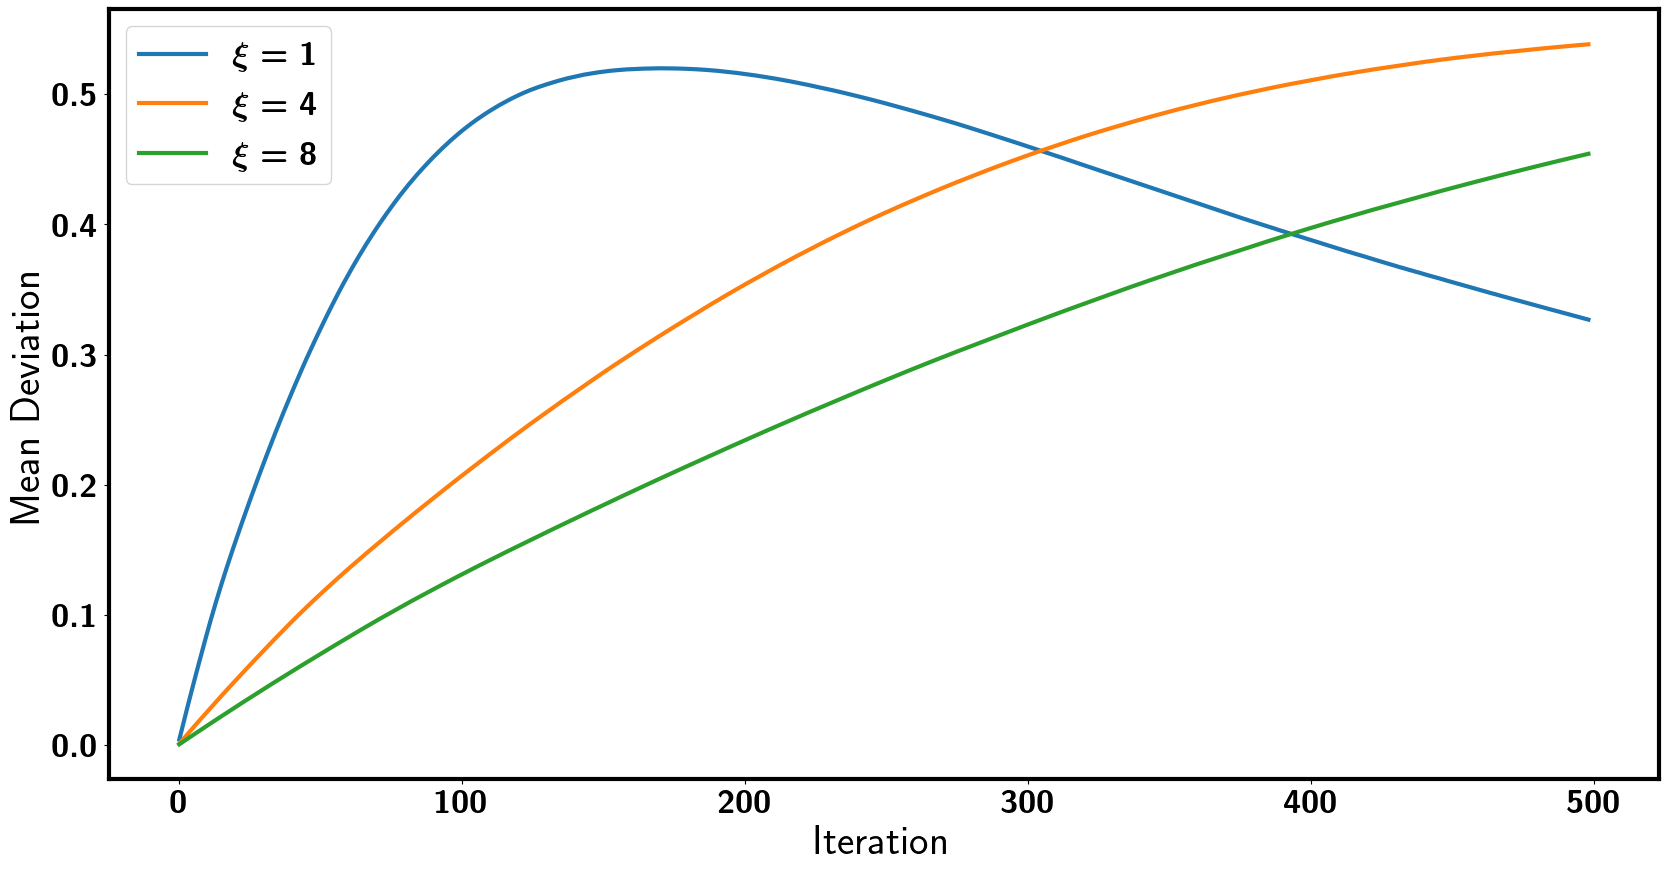

In [45]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (10, 10),
              'font.size': 24,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(20)

# plt.subplot(1, 2, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Mean Deviation')

ax1.plot(image_agnostic_xi_y_mean[1][:MAX_DATA], label=r'$\xi=1$', linewidth=3)

ax1.plot(image_agnostic_xi_y_mean[2][:MAX_DATA], label=r'$\xi=4$', linewidth=3)

ax1.plot(image_agnostic_xi_y_mean[0][:MAX_DATA], label=r'$\xi=8$', linewidth=3)

ax1.legend(loc="upper left")

plt.show()

In [46]:
f.savefig("xi", bbox_inches='tight', pad_inches=0.5)

### 2. 1.3 Attack Strength (epsilon)

In [47]:
image_agnostic_epsilon_file = get_tfb_file("logs/image-agnostic/train/epsilon")

In [48]:
image_agnostic_epsilon_file

['logs/image-agnostic/train/epsilon/0.1_0.0002_4/20220823-182557/events.out.tfevents.1661275574.trustai-pc',
 'logs/image-agnostic/train/epsilon/2_0.0002_4/20220823-184220/events.out.tfevents.1661276556.trustai-pc',
 'logs/image-agnostic/train/epsilon/4_0.0002_4/20220823-205937/events.out.tfevents.1661284795.trustai-pc',
 'logs/image-agnostic/train/epsilon/1_0.0002_4/20220823-160003/events.out.tfevents.1661266818.trustai-pc',
 'logs/image-agnostic/train/epsilon/8_0.0002_4/20220823-211602/events.out.tfevents.1661285778.trustai-pc']

In [49]:
image_agnostic_epsilon_y_abs = get_tfb_data(image_agnostic_epsilon_file, "y_mean")

In [50]:
MAX_DATA = -1

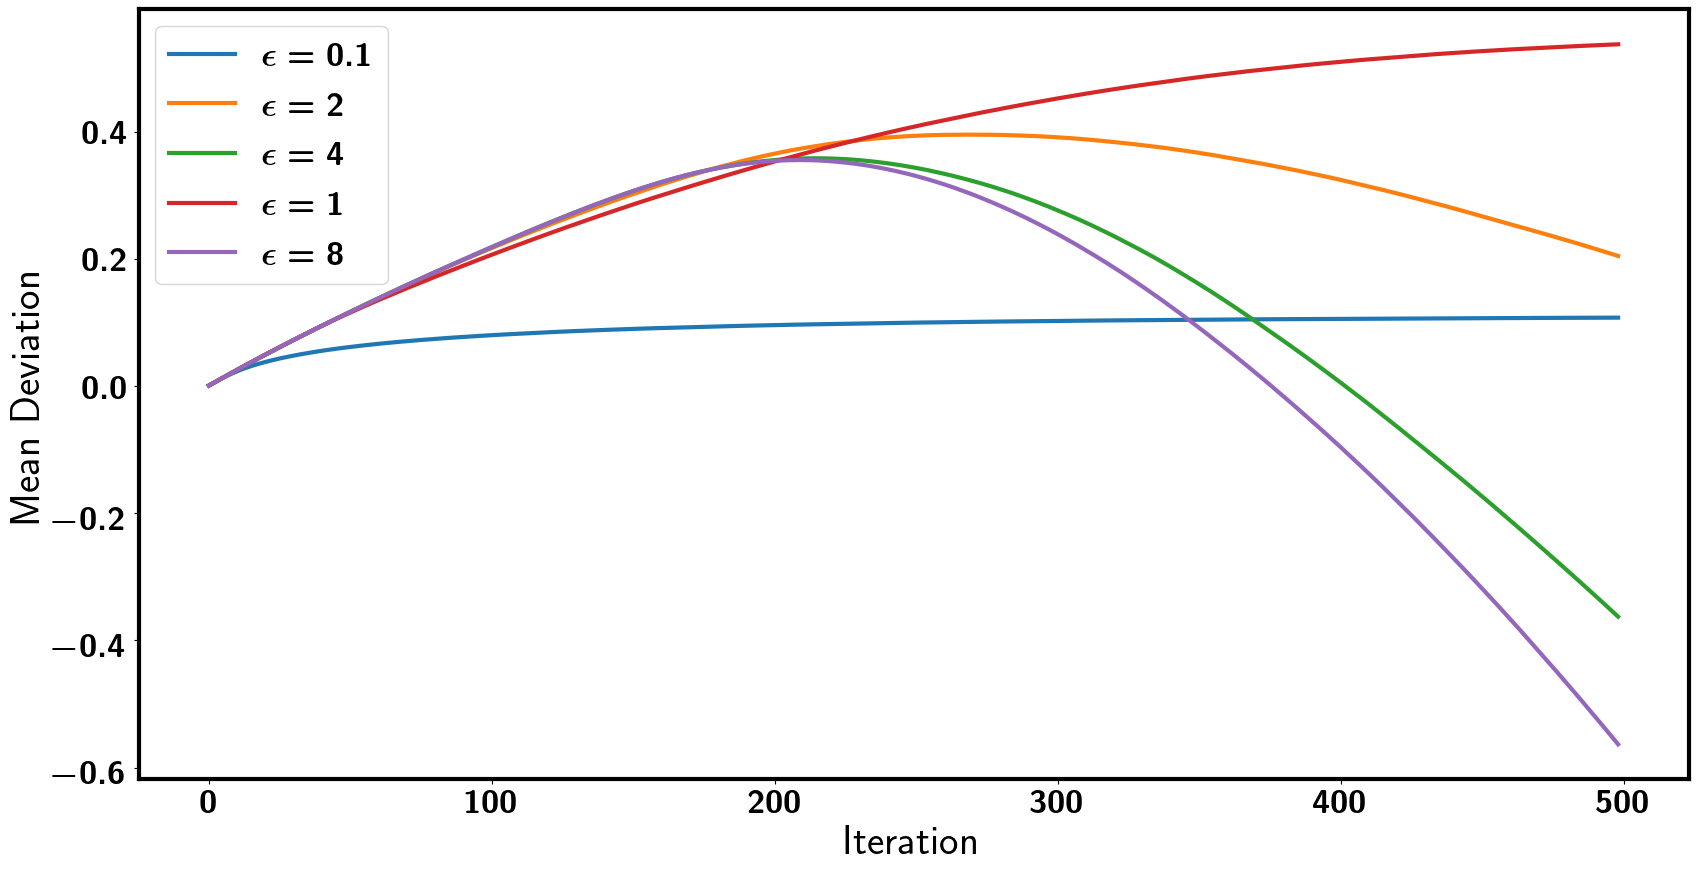

In [51]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (10, 10),
              'font.size': 24,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(20)

# plt.subplot(1, 2, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Mean Deviation')

ax1.plot(image_agnostic_epsilon_y_abs[0][:MAX_DATA], label=r'$\epsilon=0.1$', linewidth=3)

ax1.plot(image_agnostic_epsilon_y_abs[1][:MAX_DATA], label=r'$\epsilon=2$', linewidth=3)

ax1.plot(image_agnostic_epsilon_y_abs[2][:MAX_DATA], label=r'$\epsilon=4$', linewidth=3)

ax1.plot(image_agnostic_epsilon_y_abs[3][:MAX_DATA], label=r'$\epsilon=1$', linewidth=3)

ax1.plot(image_agnostic_epsilon_y_abs[4][:MAX_DATA], label=r'$\epsilon=8$', linewidth=3)

ax1.legend(loc="upper left")

plt.show()

In [52]:
f.savefig("epsilon", bbox_inches='tight', pad_inches=0.5)

## 2.2 Deployment

In [53]:
image_agnostic_file = get_tfb_file("logs/image-agnostic/online")

In [54]:
image_agnostic_file

['logs/image-agnostic/online/20220823-222228/events.out.tfevents.1661289770.5CG027B3S1',
 'logs/image-agnostic/online/20220824-010919/events.out.tfevents.1661299824.5CG027B3S1',
 'logs/image-agnostic/online/20220823-220349/events.out.tfevents.1661288661.5CG027B3S1']

In [55]:
image_agnostic_y_true = get_tfb_data(image_agnostic_file, "y_true")
image_agnostic_y_adv = get_tfb_data(image_agnostic_file, "y_adv")

### 2.2.1 Random Noises

In [56]:
MAX_DATA = 90
INDEX = 2

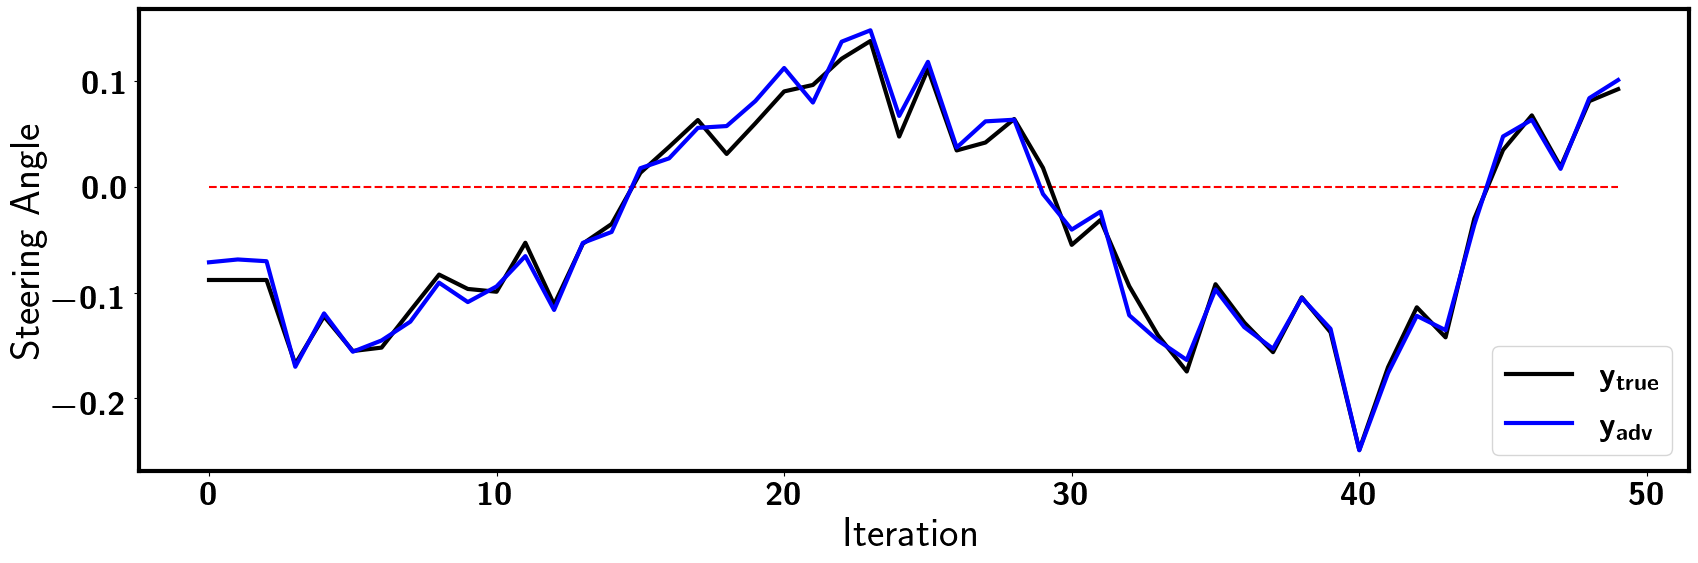

In [57]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (10, 10),
              'font.size': 24,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)


f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(6)
f.set_figwidth(20)

# plt.subplot(1, 2, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Steering Angle')

ax1.plot(image_agnostic_y_true[INDEX][0:50], 'k-', label='$y_{true}$', linewidth=3)
ax1.plot(image_agnostic_y_adv[INDEX][0:50], 'b-', label='$y_{adv}$', linewidth=3)

ax1.legend(loc="lower right")

ax1.hlines(0, 0, 50-1, color='red', linestyles='dashed')

plt.show()

In [58]:
f.savefig("uni_random", bbox_inches='tight', pad_inches=0.5)

### 2.2.2 Left Attack

In [59]:
MAX_DATA = 90
INDEX = 1

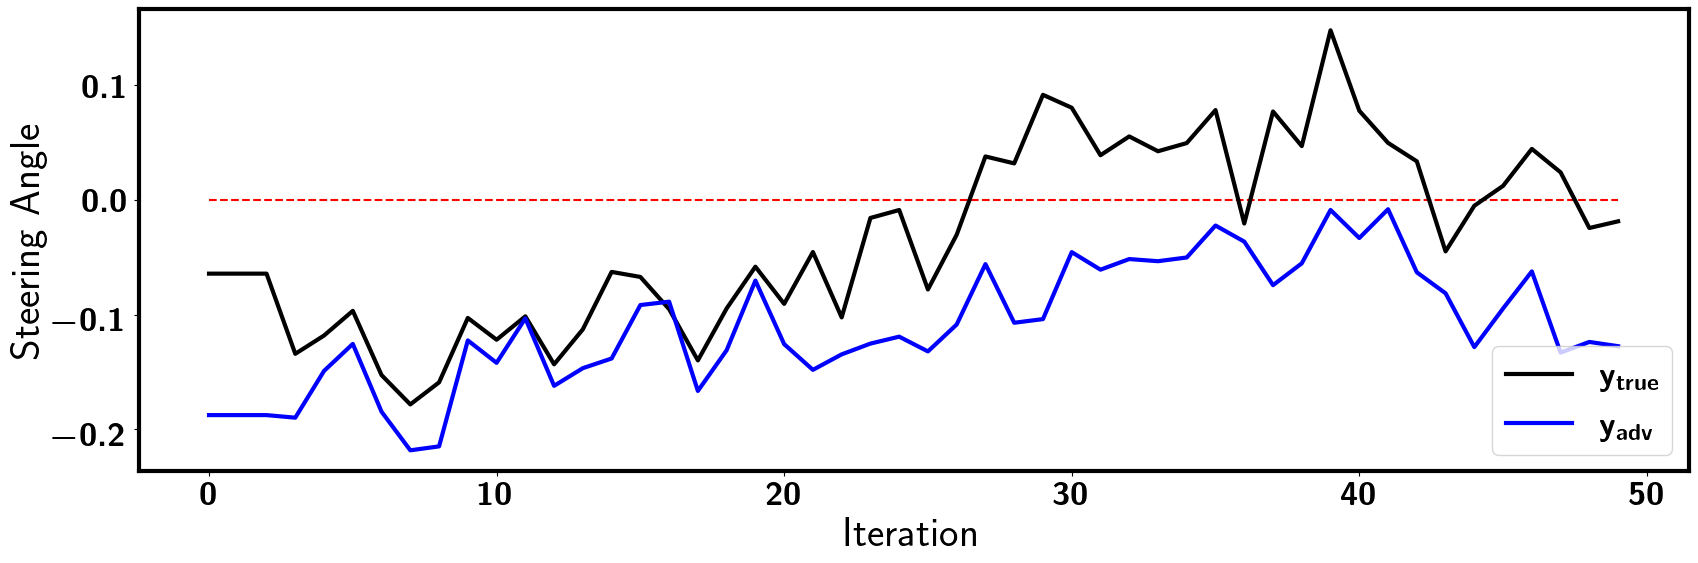

In [60]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (10, 10),
              'font.size': 24,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)


f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(6)
f.set_figwidth(20)

# plt.subplot(1, 2, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Steering Angle')

ax1.plot(image_agnostic_y_true[INDEX][0:50], 'k-', label='$y_{true}$', linewidth=3)
ax1.plot(image_agnostic_y_adv[INDEX][0:50], 'b-', label='$y_{adv}$', linewidth=3)

ax1.legend(loc="lower right")

ax1.hlines(0, 0, 50-1, color='red', linestyles='dashed')

plt.show()

In [61]:
f.savefig("uni_left", bbox_inches='tight', pad_inches=0.5)

### 2.2.3 Right Attack

In [62]:
MAX_DATA = 90
INDEX = 0

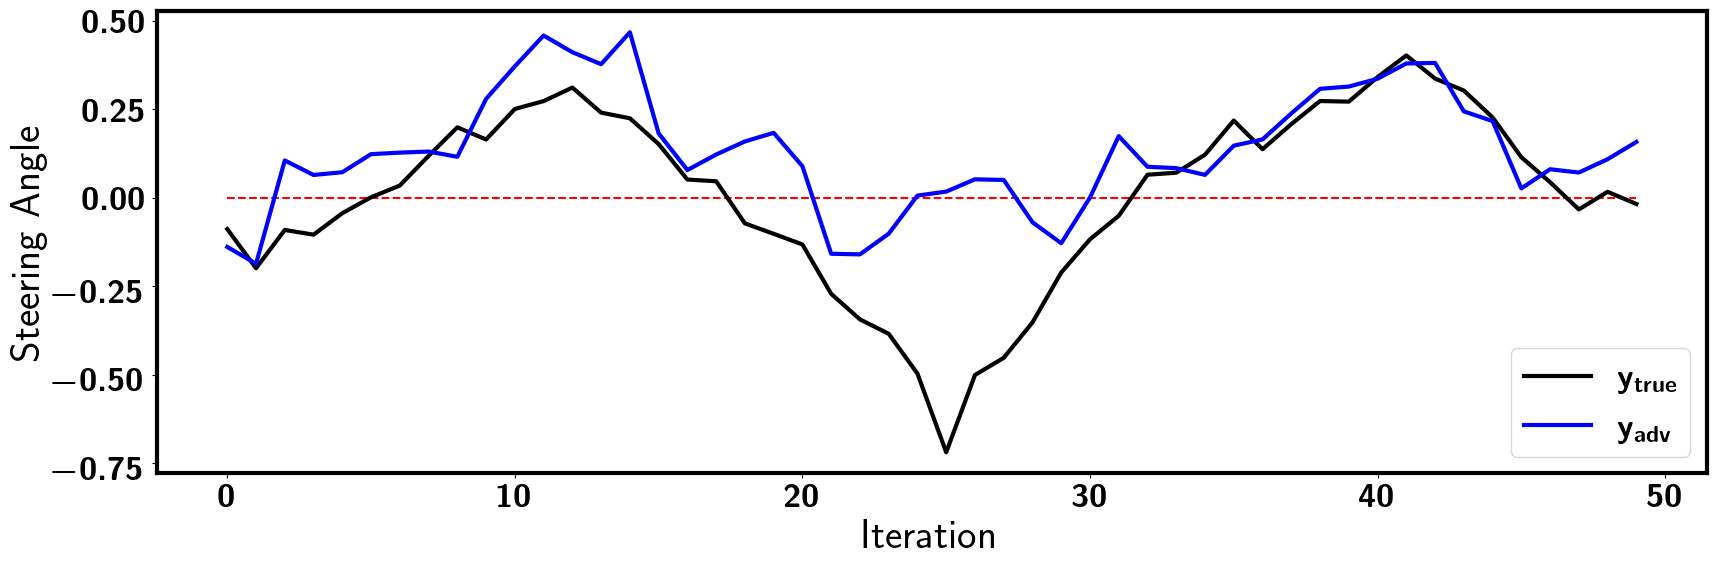

In [63]:
parameters = {'axes.labelsize': 30,
              'axes.linewidth': 3,
              'figure.figsize': (10, 10),
              'font.size': 24,
              'text.latex.preamble': r'\usepackage{sfmath} \boldmath',
              'text.usetex': True,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)


f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(6)
f.set_figwidth(20)

# plt.subplot(1, 2, 1)

ax1.set_xlabel('Iteration')

ax1.set_ylabel('Steering Angle')

ax1.plot(image_agnostic_y_true[INDEX][40:MAX_DATA], 'k-', label='$y_{true}$', linewidth=3)
ax1.plot(image_agnostic_y_adv[INDEX][40:MAX_DATA], 'b-', label='$y_{adv}$', linewidth=3)

ax1.legend(loc="lower right")

ax1.hlines(0, 0, 50-1, color='red', linestyles='dashed')

plt.show()

In [64]:
f.savefig("uni_right", bbox_inches='tight', pad_inches=0.5)

## 2.3 Summary

In [65]:
image_agnostic_summary_file = get_tfb_file("logs/image-agnostic/summary")

In [66]:
image_agnostic_summary_file

['logs/image-agnostic/summary/8/20220824-014717/events.out.tfevents.1661302054.5CG027B3S1',
 'logs/image-agnostic/summary/0.1/20220824-013107/events.out.tfevents.1661301138.5CG027B3S1',
 'logs/image-agnostic/summary/2/20220824-014056/events.out.tfevents.1661301678.5CG027B3S1',
 'logs/image-agnostic/summary/1/20220824-013812/events.out.tfevents.1661301509.5CG027B3S1',
 'logs/image-agnostic/summary/4/20220824-014359/events.out.tfevents.1661301854.5CG027B3S1']

In [67]:
image_agnostic_summary_y_diff = get_tfb_data(image_agnostic_summary_file, "y_diff")

In [68]:
print("[epsilon=0.1] Mean Deviation", np.mean(np.abs(np.array(image_agnostic_summary_y_diff[0]))[:800]))

[epsilon=0.1] Mean Deviation 0.1275278390327003


In [69]:
print("[epsilon=1] Mean Deviation", np.mean(np.abs(np.array(image_agnostic_summary_y_diff[1]))[:800]))

[epsilon=1] Mean Deviation 0.0373276163416449


In [70]:
print("[epsilon=2] Mean Deviation", np.mean(np.abs(np.array(image_agnostic_summary_y_diff[2]))[:800]))

[epsilon=2] Mean Deviation 0.12943450805847534


In [71]:
print("[epsilon=4] Mean Deviation", np.mean(np.abs(np.array(image_agnostic_summary_y_diff[3]))[:800]))

[epsilon=4] Mean Deviation 0.11094592113862746


In [72]:
print("[epsilon=8] Mean Deviation", np.mean(np.abs(np.array(image_agnostic_summary_y_diff[4]))[:800]))

[epsilon=8] Mean Deviation 0.11311754258000292
